In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score as r2
from sklearn.cluster import KMeans

pd.options.display.max_columns=300

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [49]:
df=pd.read_csv('train.csv')
tf=pd.read_csv('test.csv')

In [50]:
data=df.copy()

In [51]:
test=tf.copy()

In [52]:
#data.info()

In [53]:
test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [54]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [55]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Начальная обработка

In [56]:
data.drop(['Id'], axis=1, inplace=True)

In [57]:
data.drop(4853,inplace=True)
data.drop(4262,inplace=True)
data.drop(6977,inplace=True)
data.drop(1454,inplace=True)
data.loc[1497, 'HouseYear']=2008
data.loc[4189, 'HouseYear']=1968
data.loc[4328, 'LifeSquare']=74
data.loc[4690, 'Square']=41
data.loc[4690, 'LifeSquare']=41
data.loc[8584, 'KitchenSquare']=19
data.loc[1064, 'KitchenSquare']=20

In [58]:
def fillna_LifeSquare(df, df_source):
    df['LifeSquare']=df.LifeSquare.fillna(df.Square / (df_source.Square.mean() / df_source.LifeSquare.mean()))
    return df

In [59]:
def prepare_square(df, df_source):
    R_sq = df_source.Square.mean() / df_source.Rooms.mean()
    df.loc[df['LifeSquare']>df['Square'], 'LifeSquare']=df['Square']
    return df  

## Healthcare_1_mean

In [60]:
def fillna_Healthcare_1(df, source_df):
    hc1 = source_df.groupby(['Helthcare_2'])[['Healthcare_1']].mean().rename(columns={'Healthcare_1':'Healthcare_1_mean'})
    df=pd.merge(df, hc1, on=['Helthcare_2'], how='left')
    df['Healthcare_1']=df.Healthcare_1.fillna(df['Healthcare_1_mean'])
    df=df.drop('Healthcare_1_mean',axis=1)
    return df

### Clusters_test

In [229]:
train_scaled=scaler.fit_transform(train.loc[:,['DistrictId','HouseYear']])

In [232]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=2177)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    #print(temp_inertia)
    inertia_arr.append(temp_inertia)

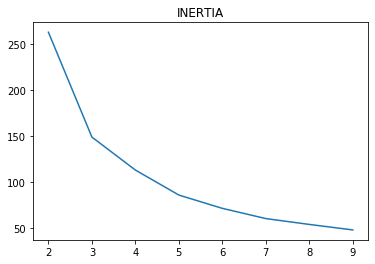

In [233]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA');

In [83]:
clst = 5;

### TotaL

In [61]:
#train, valid = train_test_split(data,test_size=0.3,random_state=2177)
train = df.copy()
test = tf.copy()

In [62]:
def prepare_data(df, df_source):
    df = fillna_LifeSquare(df, df_source)
    df = prepare_square(df, df_source)
    df = fillna_Healthcare_1(df, df_source)
    return df

In [63]:
def prepare_test(df, df_source):
    df = fillna_LifeSquare(df, df_source)
    df = prepare_square(df, df_source)
    df = fillna_Healthcare_1(df, df_source)
    return df

In [64]:
train = prepare_data(train, train)

In [65]:
#valid = prepare_data(valid, train)
test = prepare_data(test, train)

### Clusters

In [66]:
scaler=MinMaxScaler()

In [67]:
train_scaled=scaler.fit_transform(train.loc[:,['DistrictId','HouseYear']])
agl=AgglomerativeClustering(n_clusters=5)
train['DH_cls']=agl.fit_predict(train_scaled)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train['DH_cls'])
#valid_scaled=scaler.transform(valid.loc[:,['DistrictId','HouseYear']])
#valid['DH_cls']=knn.predict(valid_scaled)
test_scaled=scaler.transform(test.loc[:,['DistrictId','HouseYear']])
test['DH_cls']=knn.predict(test_scaled)

### Split

In [68]:
X_train=train.drop(['Price'], axis=1)
y_train=train['Price']
#X_test=valid.drop(['Price'], axis=1)
#y_test=valid['Price']
X_test=test

### to_Obj

In [69]:
X_train[['DH_cls']] = X_train[['DH_cls']].astype(object);
X_test[['DH_cls']] = X_test[['DH_cls']].astype(object);

### Dummies

In [70]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Model

In [71]:
feats=['Square', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 
       'Shops_2_A', 'Shops_2_B', 'DH_cls_0', 'DH_cls_1', 'DH_cls_2', 'DH_cls_3', 'DH_cls_4']

In [72]:
rfr = RF(n_estimators=1000, max_depth=15, max_features='auto', min_samples_split=110,
         min_samples_leaf=2,  random_state=2177, n_jobs=-1)

In [73]:
%%time
rfr.fit(X_train.loc[:,feats], y_train)

Wall time: 2.88 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=110,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=2177, verbose=0,
                      warm_start=False)

In [74]:
#y_pred_rfr = rfr.predict(X_test.loc[:,feats])
test['Price'] = rfr.predict(X_test.loc[:,feats])

In [75]:
#r2(y_test, y_pred_rfr)

In [76]:
y_pred_tain_rfr = rfr.predict(X_train.loc[:,feats])

In [77]:
r2(y_train, y_pred_tain_rfr)

0.7372461163454486

In [78]:
test.loc[:,['Id','Price']].to_csv('EShenk_pridictions.csv',index=False)

In [79]:
pd.read_csv('EShenk_pridictions.csv')

,Id,Price
0,725,151274.341930
1,15856,209336.760667
2,5480,140776.098704
3,15664,319779.379505
4,14275,142106.749398
5,7633,194248.857338
6,13329,162286.327252
7,5502,217505.877544
8,4220,290164.320073
9,11538,215759.704434


In [80]:
importances =  rfr.feature_importances_
importances

array([5.59089293e-01, 4.31453475e-02, 1.39439806e-01, 1.18856794e-01,
       7.66207304e-02, 1.92252094e-02, 2.29079689e-02, 1.17880161e-04,
       1.24387533e-04, 4.20582017e-04, 2.94710963e-04, 1.70920400e-03,
       2.40414078e-03, 2.62304009e-03, 7.87576585e-04, 1.22333279e-02])

In [81]:
imp_list = pd.DataFrame({
    "col_name": X_train.loc[:,feats].columns.values,
    "imp_val": importances,
})

imp_list.sort_values(["imp_val"], axis=0, ascending=False)

,col_name,imp_val
0,Square,0.559089
2,Social_1,0.139440
3,Social_2,0.118857
4,Social_3,0.076621
1,Ecology_1,0.043145
6,Shops_1,0.022908
5,Healthcare_1,0.019225
15,DH_cls_4,0.012233
13,DH_cls_2,0.002623
12,DH_cls_1,0.002404


In [227]:
parameters = {
    'n_estimators': range(20,60),
    'max_depth': [5,6,7,8],
}

clf = GridSearchCV(
    estimator=RF(),
    param_grid=parameters,
    scoring='r2',
    cv=2,
    n_jobs=-1,
)


In [645]:
clf.fit(X_train, y_train)
print(clf.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=54,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
